In [1]:
'''
Author: Brian Pondi
Date: 04-05-2021
Topic: CMEMS Exploratory Data Access for Optimized Ship Routing.
'''
from owslib.wms import WebMapService 
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import io
import PIL.Image as Image

In [2]:
# Global ocean  waves data and ocean physics data

global_ocean_waves = WebMapService('https://nrt.cmems-du.eu/thredds/wms/global-analysis-forecast-wav-001-027', version='1.3.0')
global_ocean_physics = WebMapService('https://nrt.cmems-du.eu/thredds/wms/global-analysis-forecast-phy-001-024', version='1.3.0')


In [3]:
print("---> GLOBAL OCEAN WAVES ANALYSIS AND FORECAST content :")
print( list(global_ocean_waves.contents))
print("---> GLOBAL OCEAN 1/12° PHYSICS ANALYSIS AND FORECAST UPDATED DAILY content :")
print(list(global_ocean_physics.contents))


---> GLOBAL OCEAN WAVES ANALYSIS AND FORECAST content :
['VHM0', 'VMDR_WW', 'VHM0_WW', 'VMDR_SW1', 'VTM01_SW1', 'VMDR_SW2', 'VTM01_SW2', 'VMDR', 'VTM10', 'VHM0_SW1', 'VHM0_SW2', 'VTPK', 'VSDX', 'VSDY', 'VPED', 'VTM02', 'VTM01_WW']
---> GLOBAL OCEAN 1/12° PHYSICS ANALYSIS AND FORECAST UPDATED DAILY content :
['mlotst', 'zos', 'bottomT', 'sithick', 'siconc', 'usi', 'vsi', 'thetao', 'so', 'uo', 'vo', 'sea_ice_velocity', 'sea_water_velocity']


In [4]:
# 1. Spectral significant wave height (metres) Metadata
sea_wave_height = 'VHM0'
print(global_ocean_waves [sea_wave_height].title)
print(global_ocean_waves [sea_wave_height].queryable)
print(global_ocean_waves [sea_wave_height].boundingBox)

sea_surface_wave_significant_height
1
(-180.0, -80.0, 179.91666666666663, 90.0, 'CRS:84')


In [5]:
# 2. Mean wind wave direction from (degree) Metadata
sea_wave_direction = 'VMDR_WW'
print(global_ocean_waves [sea_wave_direction].title)
print(global_ocean_waves [sea_wave_direction].queryable)
print(global_ocean_waves [sea_wave_direction].boundingBox)

sea_surface_wind_wave_from_direction
1
(-180.0, -80.0, 179.91666666666663, 90.0, 'CRS:84')


In [6]:
# 3. Mean Salinity(psu) Metadata
sea_water_salinity ='so'
print(global_ocean_physics[sea_water_salinity].title)
print(global_ocean_physics[sea_water_salinity].queryable)
print(global_ocean_physics[sea_water_salinity].boundingBox)

sea_water_salinity
1
(-180.0, -80.0, 179.9166717529297, 90.0, 'CRS:84')


In [7]:
# 4. Potential temperature (°C) Metadata
sea_water_temperature = 'thetao'
print(global_ocean_physics[sea_water_temperature].title)
print(global_ocean_physics[sea_water_temperature].queryable)
print(global_ocean_physics[sea_water_temperature].boundingBox)

sea_water_potential_temperature
1
(-180.0, -80.0, 179.9166717529297, 90.0, 'CRS:84')


In [8]:
# 5. Sea ice thickness(metres) Metadata
sea_ice_thickness = 'sithick'
print(global_ocean_physics[sea_ice_thickness].title)
print(global_ocean_physics[sea_ice_thickness].queryable)
print(global_ocean_physics[sea_ice_thickness].boundingBox)

sea_ice_thickness
1
(-180.0, -80.0, 179.9166717529297, 90.0, 'CRS:84')


In [9]:
# Possible methods in global ocean wms
print([operation.name for operation in global_ocean_waves.operations])
print(global_ocean_waves.getOperationByName('GetMap').methods)
print(global_ocean_waves.getOperationByName('GetMap').formatOptions)

['GetCapabilities', 'GetMap', 'GetFeatureInfo']
[{'type': 'Get', 'url': 'http://nrt.cmems-du.eu/thredds/wms/global-analysis-forecast-wav-001-027'}]
['image/png', 'image/png;mode=32bit', 'image/gif', 'image/jpeg', 'application/vnd.google-earth.kmz']


In [10]:
# Possible methods in global ocean physical wms
print([operation.name for operation in global_ocean_physics.operations])
print(global_ocean_physics.getOperationByName('GetMap').methods)
print(global_ocean_physics.getOperationByName('GetMap').formatOptions)

['GetCapabilities', 'GetMap', 'GetFeatureInfo']
[{'type': 'Get', 'url': 'http://nrt.cmems-du.eu/thredds/wms/global-analysis-forecast-phy-001-024'}]
['image/png', 'image/png;mode=32bit', 'image/gif', 'image/jpeg', 'application/vnd.google-earth.kmz']


In [11]:
# 1. Download Spectral significant wave height data from wms

sea_wave_height_img = global_ocean_waves.getmap(layers=[sea_wave_height],
                 styles=['boxfill/rainbow'],
                 srs='EPSG:4326',
                 bbox=(-180.0, -80.0, 179.916, 90.0),
                 size=(300, 250),
                 format='image/png',
                )
out = open('global-analysis-forecast-wav-001-027_VHM0.png', 'wb')
out.write(sea_wave_height_img.read())
out.close()

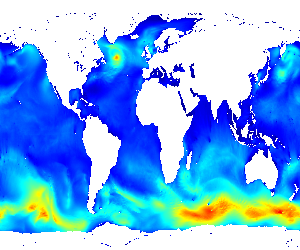

In [12]:
Image.open(io.BytesIO(sea_wave_height_img.read()))

In [13]:
# 2. Download  Mean wind wave direction data from wms
sea_wave_direction_img = global_ocean_waves.getmap(layers=[sea_wave_direction],
                 styles=['boxfill/rainbow'],
                 srs='EPSG:4326',
                 bbox=(-180.0, -80.0, 179.916, 90.0),
                 size=(300, 250),
                 format='image/png',
                )
out = open('global-analysis-forecast-wav-001-027_so.png', 'wb')
out.write(sea_wave_direction_img.read())
out.close()

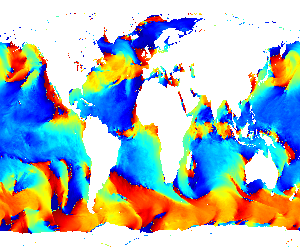

In [14]:
Image.open(io.BytesIO(sea_wave_direction_img.read()))

In [15]:
# 3. Download  Mean Sea Salinity data from wms
sea_water_salinity_img = global_ocean_physics.getmap(layers=[sea_water_salinity],
                 styles=['boxfill/rainbow'],
                 srs='EPSG:4326',
                 bbox=(-180.0, -80.0, 179.916, 90.0),
                 size=(300, 250),
                 format='image/png',
                )
out = open('global-analysis-forecast-phy-001-027_so.png', 'wb')
out.write(sea_water_salinity_img.read())
out.close()

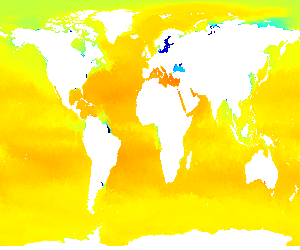

In [16]:
Image.open(io.BytesIO(sea_water_salinity_img.read()))

In [17]:
# 4. Download  Potential temperature data from wms
sea_water_temperature_img = global_ocean_physics.getmap(layers=[sea_water_temperature],
                 styles=['boxfill/rainbow'],
                 srs='EPSG:4326',
                 bbox=(-180.0, -80.0, 179.916, 90.0),
                 size=(300, 250),
                 format='image/png',
                )
out = open('global-analysis-forecast-phy-001-027_thetao.png', 'wb')
out.write(sea_water_temperature_img.read())
out.close()

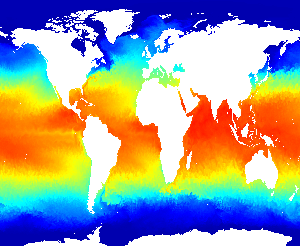

In [18]:
Image.open(io.BytesIO(sea_water_temperature_img.read()))

In [19]:
# 5. Download  Sea ice thickness data from wms
sea_ice_thickness_img = global_ocean_physics.getmap(layers=[sea_ice_thickness],
                 styles=['boxfill/rainbow'],
                 srs='EPSG:4326',
                 bbox=(-180.0, -80.0, 179.916, 90.0),
                 size=(300, 250),
                 format='image/png',
                )
out = open('global-analysis-forecast-phy-001-027_sithick.png', 'wb')
out.write(sea_ice_thickness_img.read())
out.close()

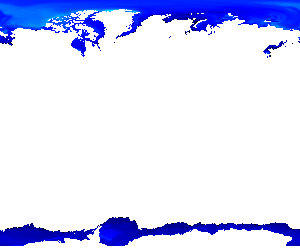

In [20]:
Image.open(io.BytesIO(sea_ice_thickness_img.read()))

In [21]:
## Why These Datasets :
'''
1. Sea Ice Thickness - Ice thickness on vessels speed and maneuverability (DOI:10.1088/1755-1315/194/7/072012)
2. Sea water temperature - Cold water is denser than warm water
3. Sea salinity - Water  with higher salinity will have greater mass, therefore more dense.
4. Sea wave height - Drop in vessel performance often experienced in presence of waves in addition (DOI:10.1016/j.oceaneng.2016.06.034)
5. Sea mean wave direction -  Criticals for afety of ship and performance (DOI:10.5380/reterm.v16i2.62206) 
'''

'\n1. Sea Ice Thickness - Ice thickness on vessels speed and maneuverability (DOI:10.1088/1755-1315/194/7/072012)\n2. Sea water temperature - Cold water is denser than warm water\n3. Sea salinity - Water  with higher salinity will have greater mass, therefore more dense.\n4. Sea wave height - Drop in vessel performance often experienced in presence of waves in addition (DOI:10.1016/j.oceaneng.2016.06.034)\n5. Sea mean wave direction -  Criticals for afety of ship and performance (DOI:10.5380/reterm.v16i2.62206) \n'

In [22]:
## NB:
'''
The WMS has been used for exploratory data access. 
For analysis,  either Subsetter service or FTP service access is preferred.
'''

'\nThe WMS has been used for exploratory data access. \nFor analysis,  either Subsetter service or FTP service access is preferred.\n'